## Red de Hopfield


La **red de Hopfield** es un tipo de red neuronal recurrente que se utiliza principalmente para resolver problemas de optimización y de memoria asociativa. Su funcionamiento se basa en un modelo dinámico donde cada neurona está conectada con todas las demás y el sistema evoluciona hacia estados de energía mínima. Estos estados mínimos representan soluciones estables del problema, lo que permite que la red actúe como una memoria que recuerda patrones previamente almacenados o como un solucionador aproximado para problemas complejos como el del viajante, el reconocimiento de patrones o la resolución de laberintos.

El principio fundamental detrás de la red de Hopfield es la minimización de una **función de energía** definida sobre el estado de activación de las neuronas. Esta energía disminuye a medida que la red se actualiza, y el sistema converge a un estado de equilibrio correspondiente a una solución posible del problema. Aunque no garantiza encontrar la solución óptima global, es útil para obtener buenas soluciones en problemas NP-completos, especialmente cuando se ajustan bien los pesos y parámetros del modelo.





**1. Representación del estado de la red**

Sea:

* $N$ el número de **neuronas** (o ciudades, si aplicamos al TSP).
* $\mathbf{v} \in \{-1, +1\}^N$ el **vector de estado** de la red, donde cada componente $v_i$ representa el estado de la neurona $i$.
* $\mathbf{W} \in \mathbb{R}^{N \times N}$ la **matriz de pesos sinápticos** (simétrica), donde $w_{ij}$ es la conexión entre las neuronas $i$ y $j$.
* $\boldsymbol{\theta} \in \mathbb{R}^N$ el **vector de umbrales** de activación.



**2. Dinámica de actualización**

La red se actualiza con la siguiente regla:

$$
v_i(t+1) = \text{sgn} \left( \sum_{j=1}^N w_{ij} v_j(t) - \theta_i \right)
$$

ó en forma matricial (para actualización síncrona):

$$
\mathbf{v}(t+1) = \text{sgn}(\mathbf{W} \mathbf{v}(t) - \boldsymbol{\theta})
$$

Donde `sgn` es la función signo:

$$
\text{sgn}(x) = 
\begin{cases}
+1 & \text{si } x > 0 \\
-1 & \text{si } x < 0 \\
0 & \text{si } x = 0
\end{cases}
$$


**3. Función de energía**

La dinámica de la red minimiza una función escalar llamada **función de energía de Hopfield**:

$$
E(\mathbf{v}) = -\frac{1}{2} \mathbf{v}^T \mathbf{W} \mathbf{v} + \boldsymbol{\theta}^T \mathbf{v}
$$

Donde:

* $\mathbf{v}^T \mathbf{W} \mathbf{v}$ representa la interacción entre neuronas.
* $\boldsymbol{\theta}^T \mathbf{v}$ representa el efecto de los umbrales.

Durante la evolución de la red, esta energía **nunca aumenta** y tiende a estabilizarse en un **mínimo local**, lo que corresponde a una solución estable del problema.


**Aplicación al problema del viajante (TSP)**

Para resolver el TSP con una red de Hopfield, usamos una matriz binaria extendida $\mathbf{V} \in \{0, 1\}^{N \times N}$, donde:

* $V_{xi} = 1$ si la **ciudad $x$** está en la **posición $i$** del recorrido.

La función de energía se redefine para incluir penalizaciones que impongan las restricciones del TSP:

$$
E(V) = \frac{A}{2} \sum_{x} \sum_{i \neq j} V_{xi} V_{xj}
+ \frac{B}{2} \sum_{i} \sum_{x \neq y} V_{xi} V_{yi}
+ \frac{C}{2} \left( \sum_{x,i} V_{xi} - N \right)^2
+ \frac{D}{2} \sum_{x,y} \sum_{i} d_{xy} V_{xi} \left( V_{y,i+1} + V_{y,i-1} \right)
$$

Donde:

* $A, B, C, D$ son constantes de penalización.
* $d_{xy}$ es la distancia entre la ciudad $x$ y la ciudad $y$.

Esta energía penaliza:

* Que una ciudad aparezca más de una vez.
* Que una posición tenga más de una ciudad.
* Que no se visiten todas las ciudades.
* El costo total del recorrido.

---



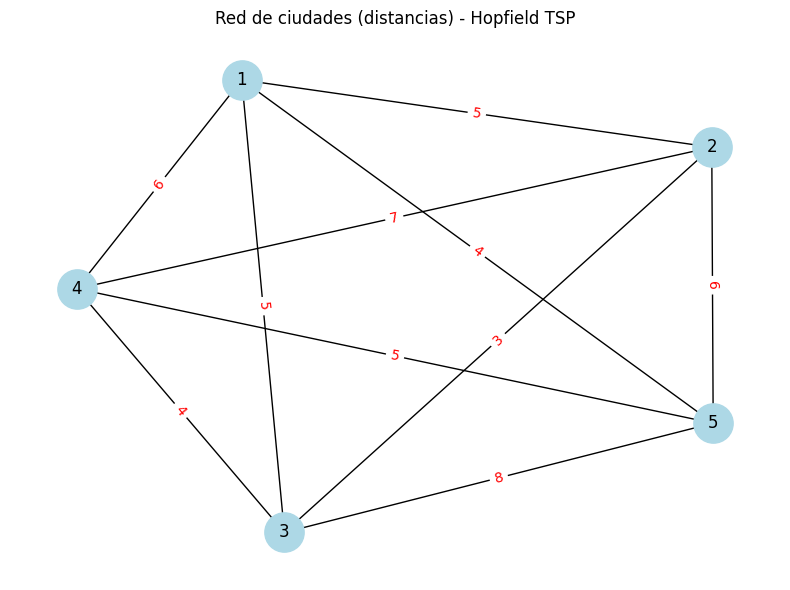

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Matriz de distancias
distancias = np.array([
    [0, 5, 5, 6, 4],
    [5, 0, 3, 7, 6],
    [5, 3, 0, 4, 8],
    [6, 7, 4, 0, 5],
    [4, 6, 8, 5, 0]
])

#Grafo
G = nx.Graph()
num_ciudades = distancias.shape[0]

for i in range(num_ciudades):
    G.add_node(i, label=f'Ciudad {i+1}')


for i in range(num_ciudades):
    for j in range(i + 1, num_ciudades):
        G.add_edge(i, j, weight=distancias[i, j])

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)  # Layout de fuerza (mejor separación visual)
plt.figure(figsize=(8, 6))

# Nodos
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
# Etiquetas
nx.draw_networkx_labels(G, pos, labels={i: f'{i+1}' for i in G.nodes}, font_size=12)
# Aristas
nx.draw_networkx_edges(G, pos)
# Pesos (distancias)
edge_labels = {(i, j): f'{d["weight"]}' for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("Red de ciudades (distancias) - Hopfield TSP")
plt.axis('off')
plt.tight_layout()
plt.show()


### Código de red de Hopfield

In [6]:
import numpy as np

# Matriz de distancias entre ciudades
distancias = np.array([
    [0, 5, 5, 6, 4],
    [5, 0, 3, 7, 6],
    [5, 3, 0, 4, 8],
    [6, 7, 4, 0, 5],
    [4, 6, 8, 5, 0]
])

# Parámetros 
n_ciudades = 5
alpha = 100 
beta = 100   
gamma = 50  
max_iter = 1000

# (matriz n_ciudades x n_ciudades)
V = np.random.rand(n_ciudades, n_ciudades)

# Función(sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for iteracion in range(max_iter):

    nuevo_V = np.copy(V)
    
    for x in range(n_ciudades):      
        for i in range(n_ciudades):  
      
            suma = 0
            

            for y in range(n_ciudades):
                if y != x:
                    suma -= alpha * V[y, i]
            

            for j in range(n_ciudades):
                if j != i:
                    suma -= beta * V[x, j]
            
            # Minimización de distancia
            for y in range(n_ciudades):
                if y != x:
                    for j in range(n_ciudades):
                        if j != i:
                            # Distancia entre ciudad x y ciudad y
                            suma -= gamma * distancias[x, y] * V[y, j]
            
            nuevo_V[x, i] = sigmoid(suma + 2*n_ciudades)
    
    V = nuevo_V
    
    # Condición de parada opcional (cambio pequeño en V)
    if iteracion > 10 and np.max(np.abs(nuevo_V - V)) < 0.001:
        break

# ruta final
ruta = np.argmax(V, axis=1)

#  distancia total
distancia_total = sum(distancias[ruta[i], ruta[(i+1)%n_ciudades]] for i in range(n_ciudades))

print("Ruta encontrada:", ruta)
print("Distancia total:", distancia_total)

Ruta encontrada: [0 0 0 0 0]
Distancia total: 0


/var/folders/qh/5bmv1f155j34j21jkvcw3blh0000gn/T/ipykernel_6766/3027128586.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Como no encontramos solución, procedemos a variar las distancias entre ciudades

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Matriz de distancias
distancias = np.array([
    [0, 5, 5, 6, 4],
    [5, 0, 3, 7, 6],
    [5, 3, 0, 4, 8],
    [6, 7, 4, 0, 5],
    [4, 6, 8, 5, 0]
])
n = distancias.shape[0]


A, B, C, D = 500, 500, 200, 500
alpha = 0.01
iteraciones = 1000

np.random.seed(42)
V = np.random.rand(n, n)


def actualizar(V):
    dV = np.zeros_like(V)
    for x in range(n):
        for i in range(n):
            suma1 = np.sum(V[x, :]) - V[x, i]
            suma2 = np.sum(V[:, i]) - V[x, i]
            suma3 = np.sum(V) - V[x, i]
            suma4 = 0
            for y in range(n):
                if y != x:
                    j_antes = (i - 1) % n
                    j_desp = (i + 1) % n
                    suma4 += distancias[x, y] * (V[y, j_antes] + V[y, j_desp])
            dV[x, i] = -A * suma1 - B * suma2 - C * suma3 - D * suma4
    return dV


for _ in range(iteraciones):
    dV = actualizar(V)
    V += alpha * dV
    V = 1 / (1 + np.exp(-V))  # función sigmoide


fila, columna = linear_sum_assignment(-V) 
ruta = np.zeros(n, dtype=int)
ruta[columna] = fila  

# Mostrar resultados
print("Ruta (índice de ciudades):", ruta)
print("Ruta (ciudades):", ruta + 1)

# Calcular distancia
dist_total = sum(distancias[ruta[i], ruta[(i+1) % n]] for i in range(n))
print("Distancia total:", dist_total)


Ruta (índice de ciudades): [0 1 2 3 4]
Ruta (ciudades): [1 2 3 4 5]
Distancia total: 21


#### Gráfica de la solución de Hopfield cambiando los parámetros

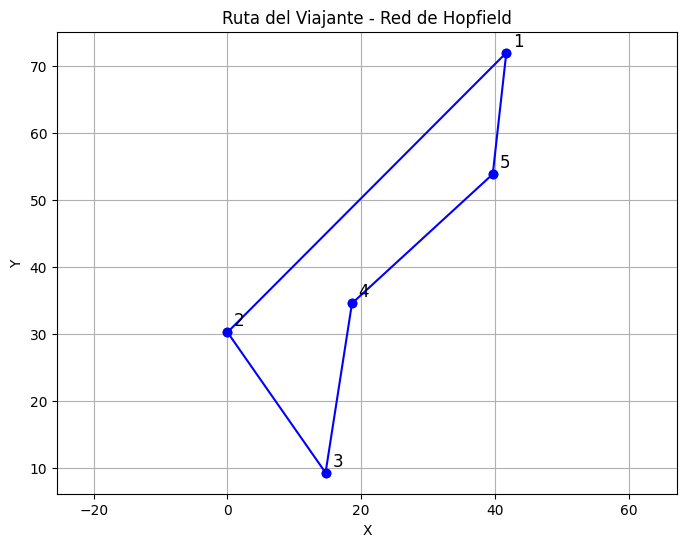

In [6]:
# Graficar la ruta
np.random.seed(1)
coords = np.random.rand(n, 2) * 100  

plt.figure(figsize=(8, 6))
for i in range(n):
    ciudad_actual = ruta[i]
    ciudad_siguiente = ruta[(i + 1) % n]
    
    x_vals = [coords[ciudad_actual][0], coords[ciudad_siguiente][0]]
    y_vals = [coords[ciudad_actual][1], coords[ciudad_siguiente][1]]
    
    plt.plot(x_vals, y_vals, 'bo-')
    plt.text(coords[ciudad_actual][0]+1, coords[ciudad_actual][1]+1, f'{ciudad_actual + 1}', fontsize=12)

plt.title("Ruta del Viajante - Red de Hopfield")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis("equal")
plt.show()